# Uczenie aktywne (Active learning)
Uczenie aktywne jest przykładem zagadnienia uczenia maszynowego w którym algorytm może poprosić o etykiety niektórych danych. Obecnie stosuje się wiele strategii wyboru danych do etykietowania. Jedna z najprostszych metod polega na wyborze danych które dadzą najwięcej informacji, tj. danych których model jest najbardziej niepewny.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [40]:
X, y = make_classification(200, class_sep = 0.9)
X_train_original, X_test, y_train_original, y_test = train_test_split(X, y)

In [41]:
from sklearn.metrics import accuracy_score

sizes = np.arange(10, X_train_original.shape[0], step=10)
scores_random, scores_active = list(), list()
X_train = X_train_original.copy()
y_train = y_train_original.copy()
X_train_random = X_train.copy()
y_train_random = y_train.copy()

In [42]:
for train_dataset_size in sizes:
    lr = LogisticRegression(penalty='l1', solver='liblinear')
    lr.fit(X_train[:train_dataset_size], y_train[:train_dataset_size])
    y_pred=lr.predict_proba(X_train[train_dataset_size:])[:, 1]
    scores_active.append(lr.score(X, y))
    indxs = np.abs(y_pred-0.5).argsort()
    X_train = np.concatenate((X_train[:train_dataset_size], X_train[train_dataset_size:][indxs]), axis=0)
    y_train = np.concatenate((y_train[:train_dataset_size], y_train[train_dataset_size:][indxs]), axis=0)
    
    
    lr_random = LogisticRegression(penalty='l1', solver='liblinear')
    lr_random.fit(X_train_random[:train_dataset_size], y_train_random[:train_dataset_size])
    scores_random.append(lr_random.score(X, y))

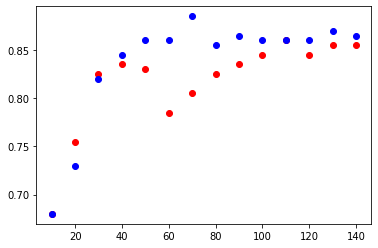

In [43]:
plt.scatter(sizes, scores_random, c='red')
plt.scatter(sizes, scores_active, c='blue')

In [6]:
print(scores_active)
print(scores_random)

[0.54, 0.865, 0.925, 0.935, 0.94, 0.94, 0.93, 0.935, 0.935, 0.935, 0.935, 0.94, 0.94, 0.94]
[0.54, 0.885, 0.9, 0.905, 0.91, 0.91, 0.9, 0.92, 0.93, 0.925, 0.93, 0.93, 0.94, 0.94]
